## Linear Regresssion
### Boston House Price Dataset

OBJECTIVE: 
Learn a linear regression model the Boston House price Dataset


In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data,test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets.shape

(404,)

In [5]:
test_targets.shape

(102,)

In [6]:
''' 
The dataset contains the following details

# Features are 
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population

#Target Value
MEDV: Median value of owner-occupied homes in $1000s
'''

print(train_data[0,:], train_targets[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2


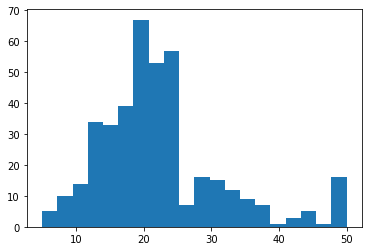

In [8]:
#Visualize stuff

import matplotlib.pyplot as plt

(n,bins,patch)=plt.hist(train_targets,bins=20)

In [9]:
# Linear Regression
# price = a0 + a1 * feat_1 + a2 * feat_2 + ... + a13 * feat_13
# a = inv(H'H) * H'y
import numpy as np

Y = train_targets    ## train target shape is(404,)   # train data shape is(404,13)
H = np. append(np.ones([404,1]), train_data, axis = 1)
print(H.shape)
#print(Y.shape)

H1 = np.matrix.transpose(H)
#print(H1.shape)
a = np.dot(np.linalg.inv(np.dot(H1,H)), np.dot(H1,Y))
print(a.shape)
print(a)

H_test = np. append(np.ones([102,1]),test_data,axis = 1) 
p = np.dot(H_test,a)
print(p.shape)

MSE = (np.square(p - test_targets)).mean()  ## checking the error in predected(p) ans with the given ans in testdata
print(MSE)

(404, 14)
(14,)
[ 4.02936706e+01 -1.19997513e-01  5.70003304e-02  3.98379660e-03
  4.12698187e+00 -2.05002963e+01  3.38024903e+00  7.56807584e-03
 -1.71189793e+00  3.34747537e-01 -1.17797225e-02 -9.02318039e-01
  8.71912756e-03 -5.55842510e-01]
(102,)
23.1955992564257


In [11]:
# Gradient Descent Algorithm
# J = (Y - Ha)'(Y - Ha)
alpha = 0.05

a1 = np.ones((14,1))
#a1 = np.vstack((1,k))

a1.shape
#a1.shape

J1 = np.dot(H,a1) - train_targets.reshape(404,1)

der = 2*np.dot(np.transpose(H),J1)
der.shape
#a = np.zeros((14,1))  
#der  14*1
#print(a1)
#a = a-alpha*der


(14, 1)

In [12]:
a1 = a1 - alpha * der
a1

array([[-3.57898047e+04],
       [-1.66688164e+05],
       [-3.72220189e+05],
       [-4.27872880e+05],
       [-2.15692509e+03],
       [-2.04338509e+04],
       [-2.22772595e+05],
       [-2.57309405e+06],
       [-1.26838109e+05],
       [-3.86714767e+05],
       [-1.55662623e+07],
       [-6.67698532e+05],
       [-1.26831518e+07],
       [-4.81145130e+05]])

In [18]:
alpha3 = 0.000000009
a2 = a.reshape(14,1)  #np.vstack((1,np.zeros((13,1)))) #np.ones((14,1)) #np.vstack((1,np.zeros((13,1)))) #np.ones((14,1))
for i in range(0,45):
    J3 = np.dot(H,a2) - train_targets.reshape(404,1)
    der3 = 2*np.dot(np.transpose(H),J3)
    a2 = a2 - alpha3*der3
    
a2

array([[ 4.02936706e+01],
       [-1.19997513e-01],
       [ 5.70003304e-02],
       [ 3.98379660e-03],
       [ 4.12698187e+00],
       [-2.05002963e+01],
       [ 3.38024903e+00],
       [ 7.56807584e-03],
       [-1.71189793e+00],
       [ 3.34747537e-01],
       [-1.17797225e-02],
       [-9.02318039e-01],
       [ 8.71912755e-03],
       [-5.55842510e-01]])

In [49]:
H_test = np. append(np.ones([102,1]),test_data,axis = 1) 
p2 = np.dot(H_test,a3)
print(p2.shape)

MSE2 = (np.square(p2 - test_targets)).mean()  ## checking the error in predected(p) ans with the given ans in testdata
print(MSE2)

(102, 1)
8.989036651791858e+19


In [ ]:
alpha2 = 0.0001
a2 = np.ones(14)
H = train_data
Y = train_targets

H = (H - H.mean())/H.std()
Y = (Y - Y.mean())/Y.std()
H = np.c_[np.ones(H.shape[0]),H]

for i in range(5000):
    error = H.dot(a2) - Y
    a2 = a2 - (alpha2*np.dot(H.T,error))
    
print(a2)    

H_test = test_data
Y_test = test_targets
#H_test = np. append(np.ones([102,1]),test_data,axis = 1) 
H_test = (H_test - H_test.mean())/H_test.std()
Y_test = (Y_test - Y_test.mean())/Y_test.std()
H_test = np.c_[np.ones(H_test.shape[0]),H_test]
p2 = np.dot(H_test,a2)
print(p2.shape)

MSE2 = (np.square(p2 - Y_test)).mean()
print(MSE2)